# Athlete Level Performance Prediction
We have provided a 10 row dataset anonymizing the athlete and season details. The target feature here is RSI. The following are the steps of implementation:
1. Data Imputation - MICE Imputer
2. Correlation based Feature Importance - CORR
3. Quartile ranging for categorization of RSI - Level 0/1/2/3
4. Data Balancing - SMOTE + ENN
5. Feature Importance based on Random Forest - RF
6. Feature Importance based on XGBoost - XGB
7. RSI Prediction
8. Partial Dependence Plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r"/content/drive/MyDrive/RSI")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [ ]:
df=pd.read_csv("RSI_Final.csv")

# Data Imputation
We opted to employ the Multiple Imputation by Chained Equation (MICE) technique to address this issue and prevent any potential bias in prediction outcomes. This technique is renowned for its accuracy in imputing missing values, as it relies on conditional modeling of the missing feature concerning the other available features.

In [ ]:
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0, estimator=RandomForestRegressor(n_estimators=10, random_state=0))
imp.fit(df)
df=pd.DataFrame(imp.fit_transform(df),columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Feature Importance based on Correlation (CORR)
This feature importance score is in range -1 to 1 and is scaled to range 0 to 1 for further analysis. The scaling was done manually using Microsoft Excel.

<ipython-input-21-f5b4059fea20>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr().abs(), cmap="YlGnBu", annot=True)


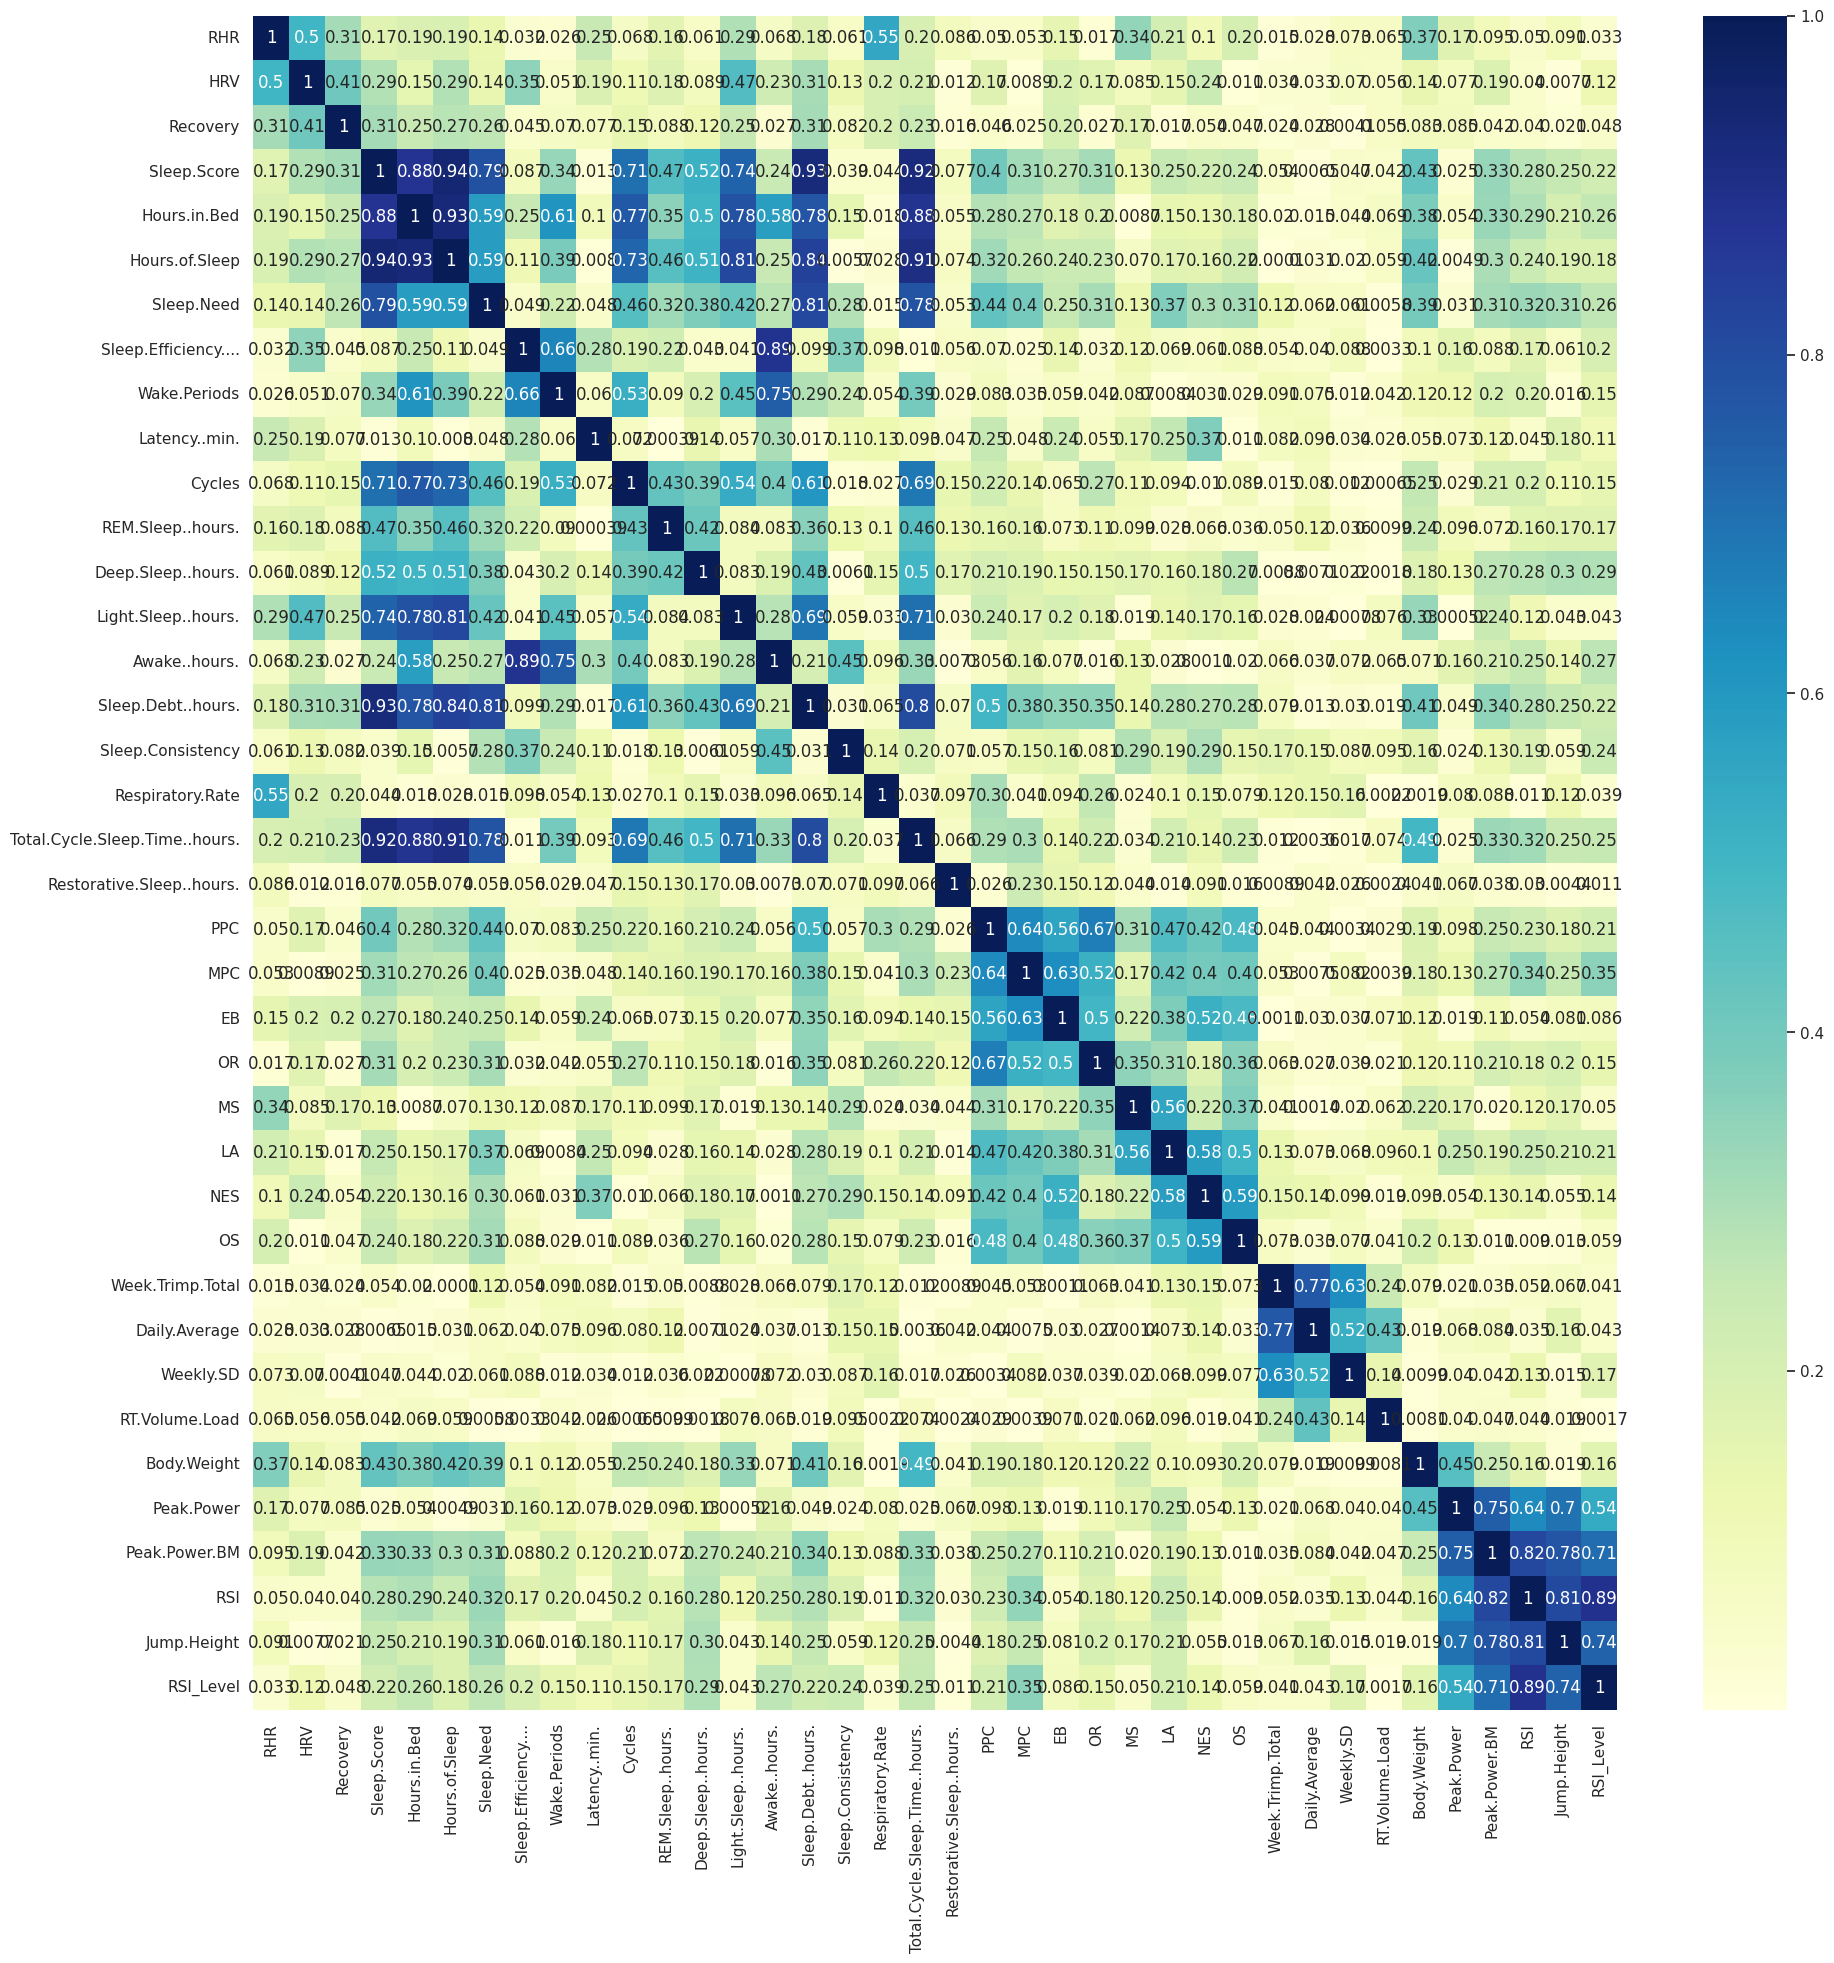

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
fig = plt.figure(figsize=(22,22))

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr().abs(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:
list_GS.to_csv("correlationRSIcheck.csv")

#Quartile Ranging for RSI categorization
Using the quartile range of RSI, athletes were categorized into four groups or classes: Upper-performance group (U): RSI of 0.41 to
0.67, Upper-Middle performance group (UM): RSI of 0.36 to 0.41, Lower-Middle performance group
(LM): RSI of 0.32 to 0.36, Lower performance group (L): RSI of 0.2 to 0.32.

In [ ]:
!pip install collinearity
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_regression
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
selector = SelectNonCollinear(0.6,scoring=f_regression)
X = df
y = df['RSI']
features = df.columns
X = X.to_numpy()
y = y.to_numpy()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4460 sha256=1475759d56b8ac3dc468a077506cabf816f69a3591a9e8ff53e2055551c7a462
  Stored in directory: /root/.cache/pip/wheels/31/bf/74/0a475ad9095545c56fe02d678ccd38739baa81513e877d91ca
Successfully built collinearity


In [ ]:
X = df
y = df['RSI']

In [ ]:
vals = np.quantile(df['RSI'], [0,0.25,0.5,0.75,1])

In [ ]:
vals

array([0.2 , 0.32, 0.36, 0.41, 0.67])

#Data Balancing
We finalized SMOTE in combination with the ENN (Edited nearest neighbors) technique. SMOTE synthesizes new instances from the minority class (oversampling). It may introduce noise as it increases the probability of class overlap. Hence, we apply the ENN data balancing technique over the oversampled dataset as a selective method that removes examples from the majority class whose neighbors, identified by the k-nearest neighbor (k-NN) algorithm, belong to a different class.

In [ ]:
!pip install deep-forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from deepforest import CascadeForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor , StackingRegressor ,HistGradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.0 MB/s 
     |████████████████████████████████| 14.8 MB 30.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
cmdstanpy 1.0.4 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
from xgboost import XGBRegressor
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

In [ ]:
pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install deep-forest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
XClassify = df.drop(["RSI_Level","RSI","Jump.Height","Peak.Power.BM","Peak.Power","Body.Weight"],axis=1).to_numpy()
yClassify = df["RSI_Level"].to_numpy()
XClassify.shape

(291, 34)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
XClassifySM, yClassifySM = oversample.fit_resample(XClassify, yClassify)
XClassifySM.shape

(332, 34)

In [ ]:
smoteX = pd.DataFrame(XClassifySM)
smoteY=pd.DataFrame(yClassifySM)
smote=pd.concat([smoteX,smoteY],axis=1)

In [ ]:
from imblearn.combine import SMOTETomek,SMOTEENN
tomek= SMOTETomek()
XClassify_tomek, yClassify_tomek = tomek.fit_resample(XClassify, yClassify)
XClassify_tomek.shape

(268, 34)

In [ ]:
tomekX = pd.DataFrame(XClassify_tomek)
tomekY=pd.DataFrame(yClassify_tomek)
tomek=pd.concat([tomekX,tomekY],axis=1)

In [ ]:
enn= SMOTEENN()
XClassify_enn, yClassify_enn = enn.fit_resample(XClassify, yClassify)
XClassify_enn.shape

(59, 34)

In [ ]:
ennX = pd.DataFrame(XClassify_enn)
ennY=pd.DataFrame(yClassify_enn)
enn=pd.concat([ennX,ennY],axis=1)
enn.to_csv("enn.csv")

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
XClassify_border, yClassify_border = BorderlineSMOTE().fit_resample(XClassify, yClassify)
XClassify_border.shape

(332, 34)

In [ ]:
borX = pd.DataFrame(XClassify_border)
borY=pd.DataFrame(yClassify_border)
bor=pd.concat([borX,borY],axis=1)

#XGBoost based Feature Importance
XGBoost, an optimized gradient boosting algorithm, similarly assigns importance scores to features according to their impact on model performance.

Feature: 0, Score: 0.02937
Feature: 1, Score: 0.03019
Feature: 2, Score: 0.02182
Feature: 3, Score: 0.02810
Feature: 4, Score: 0.03636
Feature: 5, Score: 0.03229
Feature: 6, Score: 0.03080
Feature: 7, Score: 0.03033
Feature: 8, Score: 0.03041
Feature: 9, Score: 0.02751
Feature: 10, Score: 0.02726
Feature: 11, Score: 0.02356
Feature: 12, Score: 0.03079
Feature: 13, Score: 0.02387
Feature: 14, Score: 0.03056
Feature: 15, Score: 0.02897
Feature: 16, Score: 0.02968
Feature: 17, Score: 0.03000
Feature: 18, Score: 0.02821
Feature: 19, Score: 0.02643
Feature: 20, Score: 0.03096
Feature: 21, Score: 0.03758
Feature: 22, Score: 0.03161
Feature: 23, Score: 0.03016
Feature: 24, Score: 0.02280
Feature: 25, Score: 0.03487
Feature: 26, Score: 0.02586
Feature: 27, Score: 0.03338
Feature: 28, Score: 0.02480
Feature: 29, Score: 0.02915
Feature: 30, Score: 0.02585
Feature: 31, Score: 0.02488
Feature: 32, Score: 0.03055
Feature: 33, Score: 0.04105


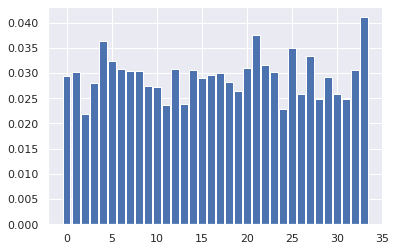

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset

# define the model
model = XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective='reg:squarederror', subsample=0.5, random_state=23)
# fit the model
model.fit(XClassify, yClassify)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

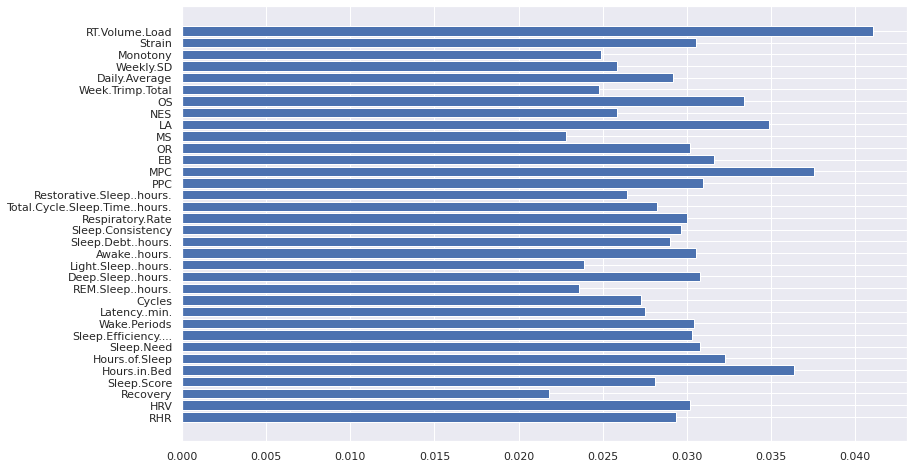

In [ ]:
col = df.columns
col = list(col)
col.remove("RSI_Level")
col.remove("RSI")
col.remove("Jump.Height")
col.remove("Peak.Power.BM")
col.remove("Peak.Power")
col.remove("Body.Weight")
pyplot.figure(figsize=(13, 8))

pyplot.barh(col, model.feature_importances_)
pyplot.show()

In [ ]:
xgb = pd.DataFrame(model.feature_importances_)

In [ ]:
xgb.to_csv("class_xgb.csv")

#Random Forest based Feature Importance
Random Forest constructs multiple decision trees and evaluates the importance of features based on their contribution to reducing impurity in the trees.

Feature: 0, Score: 0.03607
Feature: 1, Score: 0.03632
Feature: 2, Score: 0.03010
Feature: 3, Score: 0.02671
Feature: 4, Score: 0.02974
Feature: 5, Score: 0.03055
Feature: 6, Score: 0.02926
Feature: 7, Score: 0.02991
Feature: 8, Score: 0.02794
Feature: 9, Score: 0.02763
Feature: 10, Score: 0.03119
Feature: 11, Score: 0.02544
Feature: 12, Score: 0.03251
Feature: 13, Score: 0.02277
Feature: 14, Score: 0.02757
Feature: 15, Score: 0.02370
Feature: 16, Score: 0.03120
Feature: 17, Score: 0.03062
Feature: 18, Score: 0.02660
Feature: 19, Score: 0.02469
Feature: 20, Score: 0.02175
Feature: 21, Score: 0.03682
Feature: 22, Score: 0.02585
Feature: 23, Score: 0.02295
Feature: 24, Score: 0.02606
Feature: 25, Score: 0.02742
Feature: 26, Score: 0.02455
Feature: 27, Score: 0.03358
Feature: 28, Score: 0.03060
Feature: 29, Score: 0.03255
Feature: 30, Score: 0.03105
Feature: 31, Score: 0.02805
Feature: 32, Score: 0.03423
Feature: 33, Score: 0.04404


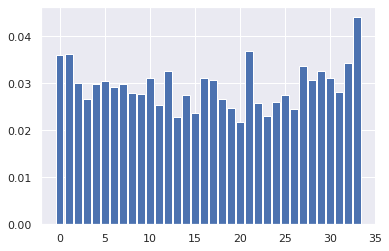

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset

# define the model
model = RandomForestClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, num_class=2, objective='multi:softprob',
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=None, subsample=1.0, verbosity=1)
# fit the model
model.fit(XClassify, yClassify)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

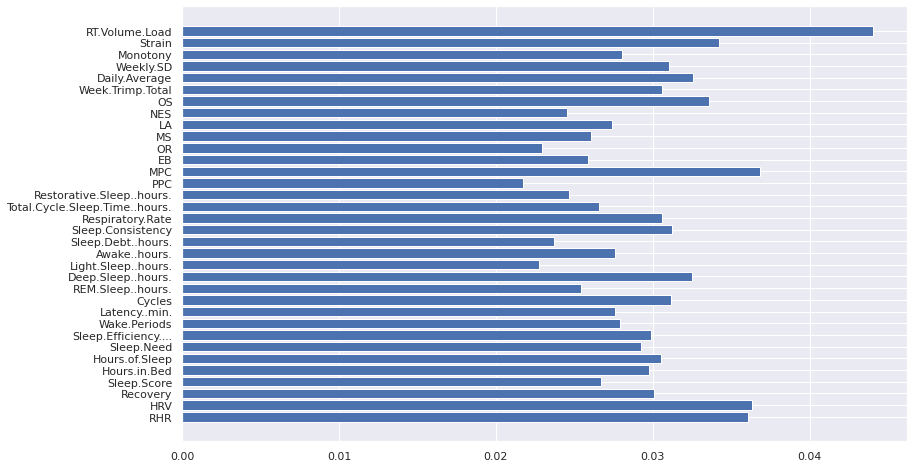

In [ ]:
col = df.columns
col = list(col)
col.remove("RSI_Level")
col.remove("RSI")
col.remove("Jump.Height")
col.remove("Peak.Power.BM")
col.remove("Peak.Power")
col.remove("Body.Weight")
pyplot.figure(figsize=(13, 8))

pyplot.barh(col, model.feature_importances_)
pyplot.show()

In [ ]:
rf = pd.DataFrame(model.feature_importances_)

In [ ]:
rf.to_csv("class_rf.csv")

The aggregation was done manually using Microsoft Excel.

#Partial Dependence Plot
It depicts how target feature changes with the variations in indepedent feature values.

In [ ]:
X = df.drop(["RSI_Level","RSI","Peak.Power","Peak.Power.BM","Jump.Height","Body.Weight"],axis=1)
y = df["RSI_Level"]

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.cm import PuOr
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay
est = RandomForestRegressor().fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


<Figure size 7200x3600 with 0 Axes>

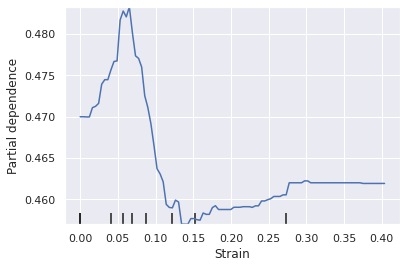

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, plot_partial_dependence
fig = plt.figure(figsize=(100, 50))
plot_partial_dependence(est, X, ['Strain'])
plt.rcParams.update({'font.size': 20})
plt.show()

#RSI Prediction

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error ,f1_score ,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from statistics import mean, stdev
skf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

In [ ]:
target_names = ['0', '1', '2','3']

In [ ]:
def classifierModelEvalution(x_record,y_record,method=""):
  accuracies = []
  f1_result_score = []
  class_accuracy = []
  for train_index, test_index in skf.split(x_record, y_record):
    x_train_fold, x_test_fold = x_record[train_index], x_record[test_index]
    y_train_fold, y_test_fold = y_record[train_index], y_record[test_index]
    clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, num_class=2, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=None, subsample=1.0, verbosity=1).fit(x_train_fold, y_train_fold)
    #print("="*80)
    #print("Result for ",algorithm)
    #print(algorithm,"Score is : ",clf.score(x_test_fold, y_test_fold))

    yClassify_pred_value = clf.predict(x_test_fold)

    #print(algorithm,"Confustion Matrix : ", confusion_matrix(y_test_fold, yClassify_pred_value))
    cm = confusion_matrix(y_test_fold, yClassify_pred_value)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_accuracy.append(  cm.diagonal().tolist())
    # evaluate predictions
    accuracy = accuracy_score(y_test_fold, yClassify_pred_value)
    accuracies.append(accuracy)
    f1_result = f1_score(y_test_fold, yClassify_pred_value, average='macro')
    f1_result_score.append(f1_result)
    #print(classification_report(y_test_fold, yClassify_pred_value, target_names=target_names))

  print("="*50)
  print("**********  Result for  ", method, "************")
  print('List of possible accuracy:', accuracies)
  print("List of F1 Score",f1_result_score)
  print("Average of F1 Score  ",sum(f1_result_score)/len(f1_result_score))
  print("Class Accuracy" , class_accuracy)
  print('\nMaximum Accuracy That can be obtained from this model is:',
        max(accuracies)*100, '%')
  print('\nMinimum Accuracy:',
        min(accuracies)*100, '%')
  print('\nOverall Accuracy:',
        mean(accuracies)*100, '%')
  print('\nStandard Deviation is:', stdev(accuracies))

In [ ]:
X = df.drop("RSI_Level",axis=1).to_numpy()
y = df["RSI_Level"].to_numpy()

In [ ]:
x_record_list = [X]
y_record_list = [y]

Algorithms = ["Normal Data"]
for i in range(len(x_record_list)):
  classifierModelEvalution(x_record_list[i],y_record_list[i],Algorithms[i])

**********  Result for   Normal Data ************
List of possible accuracy: [0.96484375, 1.0, 1.0, 0.9921568627450981, 0.996078431372549, 0.98046875, 0.984375, 0.9921568627450981, 0.996078431372549, 0.984313725490196, 0.98828125, 0.99609375, 0.9803921568627451, 0.996078431372549, 0.9882352941176471, 0.98828125, 1.0, 0.9686274509803922, 0.9803921568627451, 0.984313725490196, 0.99609375, 0.96875, 0.9764705882352941, 0.9921568627450981, 0.9647058823529412, 0.98828125, 0.96484375, 0.9803921568627451, 0.996078431372549, 0.996078431372549, 0.99609375, 0.98828125, 0.9764705882352941, 0.984313725490196, 0.996078431372549, 0.98046875, 0.97265625, 0.9882352941176471, 0.9803921568627451, 0.9686274509803922, 0.984375, 0.98046875, 0.9725490196078431, 0.9882352941176471, 1.0, 0.98828125, 1.0, 0.9725490196078431, 0.9725490196078431, 0.9803921568627451, 0.98828125, 0.96484375, 0.984313725490196, 0.996078431372549, 0.9725490196078431, 0.96484375, 0.9921875, 0.9725490196078431, 0.9921568627450981, 0.96